In [143]:
import pandas as pd
import numpy as np

In [144]:
titanic_raw = pd.read_csv("https://raw.githubusercontent.com/sumitraju/data-science/main/feature_selection/data/titanic.csv")
titanic = titanic_raw.copy()
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Exploratory Data Analysis

In [145]:
titanic.shape

(1310, 14)

In [146]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [147]:
titanic.describe(include='object')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [148]:
titanic.describe(exclude='object')

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [149]:
titanic.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [150]:
def unique_values__or_count(listOfColumns,options):
    for x in range(0, len(listOfColumns), 1):
        if(options=="unique"):
            unique_values_str = titanic[listOfColumns[x]].unique()
            print("unique_values " + listOfColumns[x])
            print(unique_values_str)
            print("------------------------")
        if(options=="count"):
            values_distribution = titanic[listOfColumns[x]].value_counts()
            print("-----------"+listOfColumns[x] +"------------")
            print(values_distribution)
            print("-----------------------")

In [151]:
unique_values__or_count(['sex','pclass','embarked','survived'],"count")

-----------sex------------
male      843
female    466
Name: sex, dtype: int64
-----------------------
-----------pclass------------
3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64
-----------------------
-----------embarked------------
S    914
C    270
Q    123
Name: embarked, dtype: int64
-----------------------
-----------survived------------
0.0    809
1.0    500
Name: survived, dtype: int64
-----------------------


In [152]:
titanic.drop(labels=["home.dest","body","boat","cabin","name","ticket"],axis=1,inplace=True)

In [153]:
titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [154]:
mean_age=titanic['age'].mean()
titanic['age'].fillna(value=mean_age, inplace=True)

In [155]:
titanic.isna().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        2
embarked    3
dtype: int64

In [156]:
frequent_embark = titanic['embarked'].value_counts().idxmax()
titanic['embarked'].fillna(value=frequent_embark, inplace=True)

In [157]:
titanic = titanic.dropna()

In [158]:
titanic.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [159]:
titanic.shape

(1308, 8)

### Encoding

In [160]:
titanic_encoded = titanic.copy()

In [161]:
titanic_encoded.isnull().values.sum()
titanic_encoded.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [162]:
from sklearn.preprocessing import OneHotEncoder

In [163]:
def OneHotEncoderCoding(listOfColumns,dataset):
    for x in range(0, len(listOfColumns),1):
        encoder = OneHotEncoder(sparse=False)
        column_encoded = encoder.fit_transform(dataset[[listOfColumns[x]]])
        feature_names = encoder.get_feature_names_out(input_features=[listOfColumns[x]])
        column_encoded = pd.DataFrame(column_encoded, columns=feature_names)
        
        dataset = dataset.drop([listOfColumns[x]], axis=1)
        column_encoded.index = dataset.index
        dataset = pd.concat([dataset,column_encoded],axis=1)
    return dataset

In [164]:
titanic_encoded = OneHotEncoderCoding(['embarked','sex'],titanic_encoded)

In [165]:
titanic_encoded.isnull().values.sum()
titanic_encoded.isna().sum()

pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
embarked_C    0
embarked_Q    0
embarked_S    0
sex_female    0
sex_male      0
dtype: int64

In [166]:
X = titanic_encoded.drop('survived', axis=1)
Y = titanic_encoded['survived']
X.head(5)

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0,1.0,0.0
1,1.0,0.9167,1.0,2.0,151.5500,0.0,0.0,1.0,0.0,1.0
2,1.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0,1.0,0.0
3,1.0,30.0000,1.0,2.0,151.5500,0.0,0.0,1.0,0.0,1.0
4,1.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0,1.0,0.0


### Feature Selection

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [168]:
featuresSelected = SelectKBest(score_func=chi2, k=10)

In [169]:
featuresSelectedFit = featuresSelected.fit(X,Y)

In [170]:
dfscores = pd.DataFrame(featuresSelectedFit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [171]:
print(featureScores.nlargest(10,'Score')) 

        Specs        Score
4        fare  6274.522141
8  sex_female   235.165564
9    sex_male   130.151013
0      pclass    38.965470
5  embarked_C    34.336634
1         age    17.302498
3       parch    17.272535
7  embarked_S     8.867044
2       sibsp     2.247888
6  embarked_Q     0.313666


### Compare model performance

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(981, 10) (981,) (327, 10) (327,)


In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [176]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [177]:
predictions = model.predict(X_test)

In [178]:
from sklearn.metrics import classification_report

In [179]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       208
         1.0       0.71      0.75      0.73       119

    accuracy                           0.80       327
   macro avg       0.78      0.79      0.78       327
weighted avg       0.80      0.80      0.80       327



Retrain a model with top features

In [180]:
titanic_top_features = titanic_encoded[['fare', 'sex_female','pclass','sex_male','embarked_C','age','parch','survived']].copy()

In [181]:
X_top_features = titanic_top_features.drop('survived', axis=1)
Y_top_features = titanic_top_features['survived']
X_top_features.head(5)

,fare,sex_female,pclass,sex_male,embarked_C,age,parch
0,211.3375,1.0,1.0,0.0,0.0,29.0000,0.0
1,151.5500,0.0,1.0,1.0,0.0,0.9167,2.0
2,151.5500,1.0,1.0,0.0,0.0,2.0000,2.0
3,151.5500,0.0,1.0,1.0,0.0,30.0000,2.0
4,151.5500,1.0,1.0,0.0,0.0,25.0000,2.0


In [182]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_top_features, Y_top_features, test_size=0.25)
print(X_train_1.shape, Y_train_1.shape, X_test_1.shape, Y_test_1.shape)

(981, 7) (981,) (327, 7) (327,)


In [183]:
model_top_features = LogisticRegression(solver='lbfgs', max_iter=10000)

In [184]:
model_top_features.fit(X_train_1, Y_train_1)

LogisticRegression(max_iter=10000)

In [185]:
predictions_top_features = model_top_features.predict(X_test_1)

In [186]:
print(classification_report(Y_test, predictions))
print("---------------------------------------------")
print(classification_report(Y_test_1, predictions_top_features))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       208
         1.0       0.71      0.75      0.73       119

    accuracy                           0.80       327
   macro avg       0.78      0.79      0.78       327
weighted avg       0.80      0.80      0.80       327

---------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       201
         1.0       0.71      0.67      0.69       126

    accuracy                           0.77       327
   macro avg       0.76      0.75      0.75       327
weighted avg       0.77      0.77      0.77       327



In [187]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [188]:
model_tc = ExtraTreesClassifier()
model_tc.fit(X,Y)

ExtraTreesClassifier()

In [189]:
print(model_tc.feature_importances_)

[0.09870672 0.24938501 0.03981703 0.04174204 0.24753875 0.01484612
 0.00366112 0.00831114 0.16979263 0.12619944]


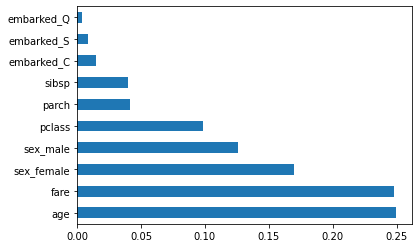

In [190]:
feat_importances = pd.Series(model_tc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Regression

In [191]:
house_raw = pd.read_csv("https://raw.githubusercontent.com/sumitraju/data-science/main/feature_selection/data/kc_house_data.csv")
house = house_raw.copy()
house.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [192]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [193]:
house.shape

(21613, 21)

In [194]:
house.describe(exclude='object')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [195]:
house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [196]:
house.drop(labels=["id","date","lat","long"],axis=1,inplace=True)

In [197]:
house.shape

(21613, 17)

In [198]:
X = house.drop('price', axis=1)
Y = house['price']
X.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(16209, 16) (16209,) (5404, 16) (5404,)


In [200]:
featuresSelectedReg = SelectKBest(score_func=chi2, k=10)

In [201]:
featuresSelectedRegFit = featuresSelectedReg.fit(X,Y)

In [202]:
dfscores = pd.DataFrame(featuresSelectedRegFit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [203]:
print(featureScores.nlargest(10,'Score')) 

            Specs         Score
3        sqft_lot  3.960291e+08
15     sqft_lot15  1.873954e+08
12   yr_renovated  9.283729e+06
2     sqft_living  5.497592e+06
9      sqft_above  4.434142e+06
10  sqft_basement  4.405627e+06
14  sqft_living15  2.772174e+06
6            view  1.941399e+04
5      waterfront  8.184489e+03
1       bathrooms  2.721923e+03


In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(16209, 16) (16209,) (5404, 16) (5404,)


In [205]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
model = linear_model.LinearRegression()

In [207]:
model.fit(X_train, Y_train)

LinearRegression()

In [208]:
Y_pred = model.predict(X_test)

In [209]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-3.89882549e+04  4.14658045e+04  1.13748248e+02 -3.08133788e-02
  2.83803043e+04  5.46381538e+05  4.43892916e+04  1.85830170e+04
  1.19814202e+05  5.12473160e+01  6.25009319e+01 -3.54477870e+03
  8.98951747e+00  8.63802768e+00  2.61182771e+01 -5.82061011e-01]
Intercept: 5295544.471544663
Mean squared error (MSE): 42455781115.30
Coefficient of determination (R^2): 0.67


In [210]:
#model_tc = ExtraTreesClassifier()
#model_tc.fit(X,Y)

In [211]:
#print(model_tc.feature_importances_)

In [212]:
#feat_importances = pd.Series(model_tc.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

Retrain model with important features

In [213]:
house_top_features = house[['price','sqft_lot','sqft_lot15','yr_renovated','sqft_living','sqft_above','sqft_basement','sqft_living15','view','waterfront','bathrooms']].copy()

In [214]:
X = house_top_features.drop('price', axis=1)
Y = house_top_features['price']
X.head(5)

,sqft_lot,sqft_lot15,yr_renovated,sqft_living,sqft_above,sqft_basement,sqft_living15,view,waterfront,bathrooms
0,5650,5650,0,1180,1180,0,1340,0,0,1.00
1,7242,7639,1991,2570,2170,400,1690,0,0,2.25
2,10000,8062,0,770,770,0,2720,0,0,1.00
3,5000,5000,0,1960,1050,910,1360,0,0,3.00
4,8080,7503,0,1680,1680,0,1800,0,0,2.00


In [215]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(16209, 10) (16209,) (5404, 10) (5404,)


In [216]:
model_top_features = linear_model.LinearRegression()

In [217]:
model_top_features.fit(X_train, Y_train)

LinearRegression()

In [218]:
Y_pred = model_top_features.predict(X_test)

In [219]:
print('Coefficients:', model_top_features.coef_)
print('Intercept:', model_top_features.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 6.27557508e-02 -8.24932358e-01  6.22057882e+01  1.47824223e+02
  7.46688900e+01  7.31553335e+01  6.76390017e+01  6.62805580e+04
  5.35431157e+05  3.28291729e+02]
Intercept: -73195.93994899525
Mean squared error (MSE): 60449289369.98
Coefficient of determination (R^2): 0.58
